# My project: open a restaurant in Amsterdam

# 1. Introduction

The purpose of this project is to help finding a top ten list of locations in Amsterdam with the lowest density of Italian Restaurants (i.e. locations where the competitors are most far away). 

I will help entrepreneurs who want to open an Italian restaurant in Amsterdam to make the best decision based on locations which are as far as possible from their competition.

I am italian living in the Netherlands, so this data analysis is very interesting for me. Italian restaurants are relatively cheap compared to other types of restaurants and they are suitable for all types of customers, therefore I will assume that the wealth of a certain neighborhood will not influence the chances of success of the restaurant. As a first analysis, I will consider the vicinity to another italian restaurant as the main cause of lower incomes generated.

Opening a restaurant in Amsterdam is a very attractive option. Amsterdam is a capital city with a huge amount of tourists all over the year.

The problem is that Amsterdam is also very pricy, rents can be sky high so the the investment can be also very risky due to the high costs of maintaining the restaurant. 

To make sure there is a return in the investment of opening a restaurant, I will study where opening a restaurant in Amsterdam is the most profitable due to the lowest amount of competitors in the vicinity.

# 2. Problem I try to solve

The major purpose of this project is to provide a list to a potential entrepreneur willing to open an italian restaurant in Amsterdam of areas where competitors would be most far away. 

# 3. Data

## Foursquare API

This project will use Four-square API as its prime data gathering source as it has a database of millions of places, especially their places API which provides the ability to perform location search, location sharing and details about a business. Using credentials of Foursquare API features of near-by places of the neighborhoods would be mined. 

## List of neighboroods in Amsterdam

As data I need a list of the neighboroods present in Amsterdam with: their postcode and possibly latitude and longitude (otherwise latitude and longitude can be generated from geocoder).

Multiple sites I can use for web scraping:
- https://postcode.site/noord-holland/amsterdam
- https://github.com/bobdenotter/4pp/blob/master/4pp.csv


# 4. Methodology

I will first look at the italian restaurants present in the different neighboroohds and then find the locations where there is a maximum distance to the nearest italian restaurant. The list of the top ten locations will be shared with the entrepreneur that can then evaluate where to open his/her restaurant also based on rents price for example.

## Libraries I will Use to Develop the Project:
Pandas: For creating and manipulating dataframes.
Folium: Python visualization library to visualize the neighborhoods cluster distribution of using interactive leaflet map.
Geocoder: To retrieve Location Data.
Beautiful Soup and Requests: To scrap and library to handle http requests.
Matplotlib: Python Plotting Module.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json, lxml
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
# import folium # map rendering library
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

try:
    import folium
except:
    !pip install folium
    import folium

print('Libraries imported.')

Libraries imported.


# 5. Start assembling the data needed

In [3]:
url2="https://raw.githubusercontent.com/francescarivello/4pp/master/4pp.csv"
postcodes=pd.read_csv(url2)
postcodes

,id,postcode,woonplaats,alternatieve_schrijfwijzen,gemeente,provincie,netnummer,latitude,longitude,soort
0,89,1100,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.376863,4.820028,Postbus
1,90,1101,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.308778,4.940660,Adres
2,91,1102,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.313517,4.954779,Adres
3,92,1103,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.323548,4.969858,Adres
4,93,1104,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.316447,4.980202,Adres
...,...,...,...,...,...,...,...,...,...,...
4694,4695,9995,Kantens,NaN,Eemsmond,Groningen,595,53.365440,6.633795,Adres
4695,4696,9996,Eppenhuizen,NaN,Eemsmond,Groningen,595,53.381294,6.696894,Adres
4696,4697,9997,Zandeweer,NaN,Eemsmond,Groningen,595,53.387513,6.681121,Adres
4697,4698,9998,Rottum,NaN,Eemsmond,Groningen,595,53.382942,6.620084,Adres


### Filter the data to keep only gemeente Amsterdam
In the postcodes dataframe there was data for all the gemeenten in The Netherlands, I reduce it to only Amsteradm since I am interested in opening an Italian restaurant in Amsterdam.

In [4]:
Amsterdam_postcodes = postcodes[(postcodes.gemeente == "Amsterdam")]
Amsterdam_postcodes

,id,postcode,woonplaats,alternatieve_schrijfwijzen,gemeente,provincie,netnummer,latitude,longitude,soort
0,89,1100,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.376863,4.820028,Postbus
1,90,1101,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.308778,4.940660,Adres
2,91,1102,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.313517,4.954779,Adres
3,92,1103,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.323548,4.969858,Adres
4,93,1104,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.316447,4.980202,Adres
...,...,...,...,...,...,...,...,...,...,...
93,84,1095,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.361438,4.956728,Adres
94,85,1096,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.336341,4.919030,Adres
95,86,1097,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.346380,4.934099,Adres
96,87,1098,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.351124,4.948233,Adres


# 6. Get a first visualization of the geographical distribution of the data collected

### Create a map of Amsterdam using the latitude and longitude value

In [35]:
address = 'Amsterdam'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Amsterdam are 52.3727598, 4.8936041.


In [36]:
map_Amsterdam = folium.Map(location=[latitude, longitude], zoom_start=11)

### Add markers of the different postcodes to the map of Amsterdam

In this case every dot represents the center of a postcode "area" to visualize the distribution of postcodes in Amsterdam as well as the region where we have data.

In [37]:
for lat, lng, postcode, neighborhood in zip(Amsterdam_postcodes['latitude'], Amsterdam_postcodes['longitude'], Amsterdam_postcodes['postcode'], Amsterdam_postcodes['woonplaats']):
    label = '{}, {}'.format(neighborhood, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Amsterdam)  

### Make a circle around Amsterdam that contains the whole are of postcodes studies
Using a circle of radius 12 km, centered in the center of Amstersam contains all the postcodes/neighboroods that we are interested to analyze in this study.

In [38]:
folium.Circle(
        [latitude, longitude],
        radius=12000,
        color='orange',
        fill=False,
        parse_html=False).add_to(map_Amsterdam) 
map_Amsterdam

# 7. Collect all the venues in the area from interest from foursquare

### Define foursquare credentials

In [39]:
CLIENT_ID = 'GRK15GTVZNKX4FWRIZ54YPZJVQKRKGMRX2X0BQPVXZAMNWPI' # your Foursquare ID
CLIENT_SECRET = 'IRAZNUJ5GN0HNYIUFHAXXAP0FLV243X32SPA5ZPEJK2EIRPO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GRK15GTVZNKX4FWRIZ54YPZJVQKRKGMRX2X0BQPVXZAMNWPI
CLIENT_SECRET:IRAZNUJ5GN0HNYIUFHAXXAP0FLV243X32SPA5ZPEJK2EIRPO


### Function that extracts the category of the venue

In [42]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
Amsterdam_venues = getNearbyVenues(names=Amsterdam_postcodes['postcode'],
                                   latitudes=Amsterdam_postcodes['latitude'],
                                   longitudes=Amsterdam_postcodes['longitude']
                                  )

1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1000
1001
1002
1003
1005
1006
1007
1008
1009
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1030
1031
1032
1033
1034
1035
1036
1037
1040
1041
1042
1043
1044
1045
1046
1047
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1086
1087
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099


In [45]:
print(Amsterdam_venues.shape)
Amsterdam_venues.head()

(3292, 7)


,Postcode,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1100,52.376863,4.820028,Şerifoğlu Gaziantep Baklavacısı,52.380708,4.820166,Dessert Shop
1,1100,52.376863,4.820028,Rondje Sloterplas 6 km,52.375380,4.820278,Park
2,1100,52.376863,4.820028,Şerifoğlu Café & Patisserie,52.380381,4.820672,Dessert Shop
3,1100,52.376863,4.820028,Meram West,52.380233,4.820814,Turkish Restaurant
4,1100,52.376863,4.820028,Albert Heijn,52.379813,4.823131,Supermarket


### Count the number of venues that are returned for each postcode

In [46]:
Amsterdam_venues.groupby('Postcode').count()

,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postcode,,,,,,
1000,53,53,53,53,53,53
1001,75,75,75,75,75,75
1002,75,75,75,75,75,75
1003,75,75,75,75,75,75
1005,75,75,75,75,75,75
...,...,...,...,...,...,...
1105,4,4,4,4,4,4
1106,5,5,5,5,5,5
1107,7,7,7,7,7,7


In [47]:
Amsterdam_venues["Venue Category"]

0             Dessert Shop
1                     Park
2             Dessert Shop
3       Turkish Restaurant
4              Supermarket
               ...        
3287           Supermarket
3288           Coffee Shop
3289                 Hotel
3290        Soccer Stadium
3291         Metro Station
Name: Venue Category, Length: 3292, dtype: object

# 8. Filter the data

At this stage we are interested in:
1. looking where restaurants are located in Amsterdam (all types of restaurants) -> that gives a good overview of vibrant area in the city.
2. looking specifically where italian restaurants are located in Amsterdam.

The best would be to find a location where there is a realtevely high density of restaurants but not of italian restaurants. This would mean that the area chosen is visited for eating out by many people, but is missing a particular cuisine (Italian).

### 8.1. Study the location of all types of restaurant in Amsterdam

Start by filtering the venues found in Foursquare by the ones containing the wird "Restaurant" in Venue Category.

In [48]:
Amsterdam_restaurants = Amsterdam_venues[(Amsterdam_venues["Venue Category"].str.contains("Restaurant"))]
Amsterdam_restaurants

,Postcode,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,1100,52.376863,4.820028,Meram West,52.380233,4.820814,Turkish Restaurant
9,1100,52.376863,4.820028,BeyMen Restaurant Café & Club,52.380567,4.821010,Turkish Restaurant
16,1100,52.376863,4.820028,De Rotonde kebab lunchroom,52.375487,4.820274,Fast Food Restaurant
18,1100,52.376863,4.820028,Döner Plaza,52.380821,4.821073,Turkish Restaurant
32,1101,52.308778,4.940660,GåRD - Nordic Kitchen,52.309756,4.946346,Scandinavian Restaurant
...,...,...,...,...,...,...,...
3248,1096,52.336341,4.919030,Johnny River,52.333003,4.914632,Restaurant
3258,1096,52.336341,4.919030,Amstelle Restaurant,52.333368,4.914801,Restaurant
3264,1097,52.346380,4.934099,Wong Koen,52.348469,4.938521,Chinese Restaurant
3265,1097,52.346380,4.934099,'t Hoekje,52.349000,4.938355,Fast Food Restaurant


Count the number of restaurants (of all types) per postcode.

In [49]:
Amsterdam_restaurants.groupby('Postcode').count()

,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postcode,,,,,,
1000,15,15,15,15,15,15
1001,10,10,10,10,10,10
1002,10,10,10,10,10,10
1003,10,10,10,10,10,10
1005,10,10,10,10,10,10
...,...,...,...,...,...,...
1101,5,5,5,5,5,5
1102,13,13,13,13,13,13
1103,3,3,3,3,3,3


### 8.2. Study the location of italian restaurants specifically in Amsterdam

In [50]:
Amsterdam_italian_restaurants = Amsterdam_venues[(Amsterdam_venues["Venue Category"] == "Italian Restaurant")]
Amsterdam_italian_restaurants

,Postcode,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
49,1102,52.313517,4.954779,Pasta di Mamma,52.314779,4.955087,Italian Restaurant
61,1102,52.313517,4.954779,Ernos,52.314399,4.952724,Italian Restaurant
148,1000,52.336243,4.869444,Trattoria That's Amore @Market 33,52.337395,4.871206,Italian Restaurant
172,1000,52.336243,4.869444,Gustavino,52.337406,4.873579,Italian Restaurant
179,1000,52.336243,4.869444,Julia's,52.338120,4.873353,Italian Restaurant
...,...,...,...,...,...,...,...
3105,1092,52.358913,4.921387,Spaghetteria,52.354814,4.921788,Italian Restaurant
3107,1092,52.358913,4.921387,Restaurant Oost,52.359247,4.914358,Italian Restaurant
3160,1093,52.361286,4.928454,Gallizia,52.363849,4.934255,Italian Restaurant
3167,1094,52.363659,4.935523,La Fucina,52.363776,4.936060,Italian Restaurant


In [51]:
Amsterdam_italian_restaurants.groupby('Postcode').count()

,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postcode,,,,,,
1000,3,3,3,3,3,3
1001,2,2,2,2,2,2
1002,2,2,2,2,2,2
1003,2,2,2,2,2,2
1005,2,2,2,2,2,2
1006,2,2,2,2,2,2
1007,2,2,2,2,2,2
1008,2,2,2,2,2,2
1009,2,2,2,2,2,2


### 8.3. Visualize on the map of Amsterdam geographical distribution of all restaurants against the one of Italian restaurants

In [58]:
map_Amsterdam3 = folium.Map(location=[latitude, longitude], zoom_start=12)

In [59]:
for lat, lng, venue, postcode in zip(Amsterdam_restaurants['Venue Latitude'], Amsterdam_restaurants['Venue Longitude'], Amsterdam_restaurants['Venue'], Amsterdam_restaurants['Postcode']):
    label = '{}, {}'.format(venue, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='black',
        fill=True,
        fill_color='#131a19',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Amsterdam3)  

#### In black are shown all the restaurants and in red the italian restaurants

In [61]:
for lat, lng, venue, postcode in zip(Amsterdam_italian_restaurants['Venue Latitude'], Amsterdam_italian_restaurants['Venue Longitude'], Amsterdam_italian_restaurants['Venue'], Amsterdam_italian_restaurants['Postcode']):
    label = '{}, {}'.format(venue, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#e01616',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Amsterdam3) 

folium.Circle(
        [latitude, longitude],
        radius=12000,
        color='orange',
        fill=False,
        parse_html=False).add_to(map_Amsterdam3) 
    
map_Amsterdam3

We can already see from the map that italian restaurants are mostly in the Centrum, West, Zuid and Oost. The Niew-West has some resaturants but only one italian and the Noord has no italian restaurant.

## Visualize the distribution of restaurants and italian restaurants per postcode

From the map above it is already clear that there are some areas in Amsterdam, quite densely populated by reastaurants but that have a few/none Italian restaurants. As I explained in the first part of the assignement, these neighborhoods would be perfect for starting an italian restaurant due to: 1) the limited competition and 2) to the fact that there are still enough clients going.

To better visualize therefore where would be most convenient to open an Italian Restaurant, I am going to plot the histogram of Italian restaurants versus all types of restaurants.

Count the number of italian and all restaurants grouped by postcode

In [72]:
Amsterdam_italian_restaurants_count=Amsterdam_italian_restaurants.groupby('Postcode').count()
Amsterdam_italian_restaurants_count.shape
Amsterdam_italian_restaurants_count.head()

,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postcode,,,,,,
1000,3,3,3,3,3,3
1001,2,2,2,2,2,2
1002,2,2,2,2,2,2
1003,2,2,2,2,2,2
1005,2,2,2,2,2,2


In [73]:
Amsterdam_restaurants_count=Amsterdam_restaurants.groupby('Postcode').count()
Amsterdam_restaurants_count.head()

,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postcode,,,,,,
1000,15,15,15,15,15,15
1001,10,10,10,10,10,10
1002,10,10,10,10,10,10
1003,10,10,10,10,10,10
1005,10,10,10,10,10,10


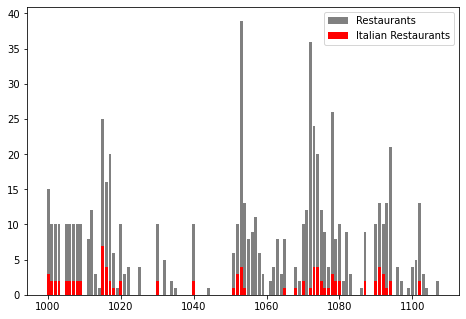

In [67]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
postcode_res = Amsterdam_restaurants_count.index.values
venue_res = Amsterdam_restaurants_count['Venue']
ax.bar(postcode_res,venue_res, label='Restaurants', color='grey')
postcode_it = Amsterdam_italian_restaurants_count.index.values
venue_it = Amsterdam_italian_restaurants_count['Venue']
ax.bar(postcode_it,venue_it,label='Italian Restaurants', color='red')
plt.legend(loc='upper right')
plt.show()

From the above histogram, it is clear that there are different proportions of italian restaurants VS total number of restaurants in the different postcodes of Amsterdam. However, from the plot it is quite difficult to determine exacly where we have a minimum number of italian restaurants VS total number of restaurants.

In [75]:
Amsterdam_italian_restaurants_count.index.values

array([1000, 1001, 1002, 1003, 1005, 1006, 1007, 1008, 1009, 1015, 1016,
       1017, 1018, 1020, 1030, 1040, 1051, 1052, 1053, 1054, 1065, 1068,
       1070, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1087,
       1090, 1091, 1092, 1093, 1094, 1102])

In [76]:
Amsterdam_restaurants_count.index.values

array([1000, 1001, 1002, 1003, 1005, 1006, 1007, 1008, 1009, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1025,
       1030, 1032, 1034, 1035, 1040, 1044, 1051, 1052, 1053, 1054, 1055,
       1056, 1057, 1058, 1059, 1061, 1062, 1063, 1064, 1065, 1068, 1069,
       1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080,
       1081, 1082, 1083, 1086, 1087, 1090, 1091, 1092, 1093, 1094, 1096,
       1097, 1099, 1100, 1101, 1102, 1103, 1104, 1107])

We can join the two dataframes to have only one with both data (all restaurants and Italian restaurants in particular).

In [112]:
joined_data=Amsterdam_restaurants_count.merge(Amsterdam_italian_restaurants_count, on='Postcode', how='left')
joined_data

,Postcode Latitude_x,Postcode Longitude_x,Venue_x,Venue Latitude_x,Venue Longitude_x,Venue Category_x,Postcode Latitude_y,Postcode Longitude_y,Venue_y,Venue Latitude_y,Venue Longitude_y,Venue Category_y
Postcode,,,,,,,,,,,,
1000,15,15,15,15,15,15,3.0,3.0,3.0,3.0,3.0,3.0
1001,10,10,10,10,10,10,2.0,2.0,2.0,2.0,2.0,2.0
1002,10,10,10,10,10,10,2.0,2.0,2.0,2.0,2.0,2.0
1003,10,10,10,10,10,10,2.0,2.0,2.0,2.0,2.0,2.0
1005,10,10,10,10,10,10,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1101,5,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
1102,13,13,13,13,13,13,2.0,2.0,2.0,2.0,2.0,2.0
1103,3,3,3,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
joined_data.drop(labels='Postcode Latitude_x', axis=1, inplace=True)

In [114]:
joined_data.drop(labels='Postcode Longitude_x', axis=1, inplace=True)
joined_data.drop(labels='Venue Latitude_x', axis=1, inplace=True)
joined_data.drop(labels='Venue Longitude_x', axis=1, inplace=True)
joined_data.drop(labels='Venue Category_x', axis=1, inplace=True)
joined_data.drop(labels='Postcode Latitude_y', axis=1, inplace=True)
joined_data.drop(labels='Postcode Longitude_y', axis=1, inplace=True)
joined_data.drop(labels='Venue Latitude_y', axis=1, inplace=True)
joined_data.drop(labels='Venue Longitude_y', axis=1, inplace=True)
joined_data.drop(labels='Venue Category_y', axis=1, inplace=True)
joined_data.columns=['Nb restaurants', 'Nb italian restaurants']

In [115]:
joined_data

,Nb restaurants,Nb italian restaurants
Postcode,,
1000,15,3.0
1001,10,2.0
1002,10,2.0
1003,10,2.0
1005,10,2.0
...,...,...
1101,5,NaN
1102,13,2.0
1103,3,NaN


It would be useful to determine then the postcodes which have restaurants but no Italian restaurants. For that we can look at the joined_data and search the postcodes that have Nb italian restaurants ==NaN

In [116]:
bool1 = pd.isnull(joined_data['Nb italian restaurants'])
postcodes_with_no_Italian_restaurants=joined_data[bool1].index.values
postcodes_with_no_Italian_restaurants

array([1011, 1012, 1013, 1014, 1019, 1021, 1022, 1025, 1032, 1034, 1035,
       1044, 1055, 1056, 1057, 1058, 1059, 1061, 1062, 1063, 1064, 1069,
       1071, 1081, 1082, 1083, 1086, 1096, 1097, 1099, 1100, 1101, 1103,
       1104, 1107])

Above is the list of all the postcodes having restaurants but no italian restaurants.
This gives already a pretty good indication about suitable neighborhoods in Amsterdam where we could start an Italian Restaurant.

Next we should classify these postcodes based on our initial requirements, we should reorder these postcodes putting as most suitables the ones with the highest number of restaurants (non italian).

In [120]:
postcodes_with_no_Italian_restaurants2=pd.DataFrame(postcodes_with_no_Italian_restaurants)
postcodes_with_no_Italian_restaurants2.head()

,0
0,1011
1,1012
2,1013
3,1014
4,1019


In [121]:
postcodes_with_no_Italian_restaurants2.columns=['Postcode']
postcodes_with_no_Italian_restaurants2.head()

,Postcode
0,1011
1,1012
2,1013
3,1014
4,1019


In [123]:
joined_data_no_Italians=joined_data.merge(postcodes_with_no_Italian_restaurants2, on='Postcode', how='right')
joined_data_no_Italians

,Postcode,Nb restaurants,Nb italian restaurants
0,1011,8,NaN
1,1012,12,NaN
2,1013,3,NaN
3,1014,1,NaN
4,1019,1,NaN
5,1021,3,NaN
6,1022,4,NaN
7,1025,4,NaN
8,1032,5,NaN
9,1034,2,NaN


In [131]:
sorted_joined_data_no_Italians = joined_data_no_Italians.sort_values(["Nb restaurants"], ascending=False)
sorted_joined_data_no_Italians.head()

,Postcode,Nb restaurants,Nb italian restaurants
22,1071,12,NaN
1,1012,12,NaN
14,1057,11,NaN
24,1082,9,NaN
13,1056,9,NaN


The 5 top postcodes are: 1071, 1012, 1057, 1082 and 1056. These are proposed as best postcodes where to possibly start an Italian restaurant in Amsterdam since they have no Italian restaurants and they have the highest number of other restaurants.

In [152]:
map_postcodesMostSuitable = folium.Map(location=[latitude, longitude], zoom_start=12)

In [155]:
top10postcodes=sorted_joined_data_no_Italians[0:10]
top10postcodes

,Postcode,Nb restaurants,Nb italian restaurants
22,1071,12,NaN
1,1012,12,NaN
14,1057,11,NaN
24,1082,9,NaN
13,1056,9,NaN
19,1063,8,NaN
12,1055,8,NaN
0,1011,8,NaN
15,1058,6,NaN
8,1032,5,NaN


In [156]:
top10postcodes.columns=['postcode','Nb restaurants', 'Nb italian restaurants']
top10postcodes

,postcode,Nb restaurants,Nb italian restaurants
22,1071,12,NaN
1,1012,12,NaN
14,1057,11,NaN
24,1082,9,NaN
13,1056,9,NaN
19,1063,8,NaN
12,1055,8,NaN
0,1011,8,NaN
15,1058,6,NaN
8,1032,5,NaN


In [157]:
Amsterdam_postcodes.head()

,id,postcode,woonplaats,alternatieve_schrijfwijzen,gemeente,provincie,netnummer,latitude,longitude,soort
0,89,1100,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.376863,4.820028,Postbus
1,90,1101,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.308778,4.940660,Adres
2,91,1102,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.313517,4.954779,Adres
3,92,1103,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.323548,4.969858,Adres
4,93,1104,Amsterdam-Zuidoost,Amsterdam Zuidoost,Amsterdam,Noord-Holland,20,52.316447,4.980202,Adres


In [158]:
top10postcodes_latlong=Amsterdam_postcodes.merge(top10postcodes, on='postcode', how='right')
top10postcodes_latlong

,id,postcode,woonplaats,alternatieve_schrijfwijzen,gemeente,provincie,netnummer,latitude,longitude,soort,Nb restaurants,Nb italian restaurants
0,10,1011,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.372976,4.903957,Adres,8,NaN
1,11,1012,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.373386,4.894064,Adres,12,NaN
2,30,1032,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.395149,4.916205,Adres,5,NaN
3,48,1055,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.381707,4.854023,Adres,8,NaN
4,49,1056,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.372369,4.854042,Adres,9,NaN
5,50,1057,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.367071,4.853112,Adres,11,NaN
6,51,1058,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.360518,4.850302,Adres,6,NaN
7,56,1063,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.381529,4.825779,Adres,8,NaN
8,64,1071,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.353865,4.882311,Adres,12,NaN
9,75,1082,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.331430,4.876693,Adres,9,NaN


In [159]:
for lat, lng, postcode, restaurants in zip(top10postcodes_latlong['latitude'], top10postcodes_latlong['longitude'], top10postcodes_latlong['postcode'], top10postcodes_latlong['Nb restaurants']):
    label = '{}, {}'.format(postcode, restaurants)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_postcodesMostSuitable)  

In [160]:
map_postcodesMostSuitable

Above are visualized the 10 postcodes where we are advicing to open an Italian restuarant in Amsterdam.

# 6. Discussion and conclusions

1. We visualized on the map of Amsterdam where all italian restaurants are and where are all types of restaurants are.
From that we could already see that that italian restaurants are mostly in the Centrum, West, Zuid and Oost. The Niew-West has some resaturants but only one italian and the Noord has no italian restaurant.

2. From the histograms visualization and the further analysis of postcodes where there are no italian restaurants but a maximum number of other restaurants we found that the best postcodes where to start an Italian restaurant in Amsterdam are 1071, 1012, 1057, 1082 and 1056.

3. The 10 postcodes which were found most suitable to open an Italian restaurant are visualized on the map on Amsterdam